In [1]:
import json
import numpy as np
import matplotlib.pylab as plt
from imageio import imread
import parser as prs
import nba_functions as nba
import matplotlib.cm as cm
%matplotlib notebook

In [2]:
game1 = json.load(open('warriors_data.json'))

In [ ]:
'KevinDurant' in game1['2017/10/17/HOUGSW/']['homeplayers'].keys()
#     print(key)

In [3]:
nba.positional_smoothing(game1)
nba.velo_accel_smoothing(game1)

In [4]:
nba.get_masses(game1)
nba.velo_accel(game1)
nba.smooth_energy(game1)
nba.ball_flagger(game1)
nba.player_flagger(game1)
nba.player_flagger2(game1)

Look up omri_casspi's mass
Look up omri_casspi's mass
Look up omri_casspi's mass
Look up kay_felder's mass
Look up quincy_pondexter's mass
Look up omri_casspi's mass
Look up george_hill's mass
Look up briante_weber's mass
Look up omri_casspi's mass
Look up willie_reed's mass


/home/stibbs1998/basketball_analytics2018/json_related/nba_functions.py:213: RuntimeWarning: invalid value encountered in less_equal
  near_ball = dist_ball <= 3


In [ ]:
%matplotlib notebook
game = '2017/10/17/HOUGSW/'
team = 'awayplayers'
fig, ax1 = plt.subplots(figsize=(7,6))

ax2 = ax1.twinx()

xticks = []
xticklabels = []
yticks = []
yticklabels = []

for i, key in enumerate(game1[game][team].keys()):
    
    energy = np.nansum(game1[game][team][key]['work'])
    en_avg = np.nanmean(game1[game][team][key]['work'])
    
    oc = np.array(game1[game][team][key]['on_court'])

    
    timeplayed = len(oc[oc==False])/25/60

    
    xticks.append(i)
    xticklabels.append(str(key))
    
    val = None
    val1 = None
    if i==1:
        val1 = 'Avg'
        val = 'Sum'
    avg = ax1.plot(i,en_avg,'co',markersize = timeplayed/2, label = val1)
    sum1 = ax2.plot(i,energy,'mo',markersize = timeplayed/2,  label = val)
    
    
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels,rotation = 67)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklabels,rotation = 67)



ax1.set_ylabel('Average Work (J)')
ax2.set_ylabel(r'Total Work (J $\cdot 10^{6}$ )')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax1.set_title('Work')

fig.legend(fancybox=True, shadow=True, ncol=9)
props = dict(boxstyle='round', facecolor='aqua', alpha=0.3)
ax1.text(0.65, 0.95, 'Golden State Warriors \nHOU@GSW 2017/10/17', transform=ax1.transAxes, fontsize=8,
verticalalignment='top', bbox=props)


plt.tight_layout()

In [ ]:
%matplotlib notebook
# game = '2017/11/24/CHIGSW/'
# team = 'awayplayers'
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12,10))

for game in game1.keys():
    
    team = 'awayplayers'
    
     
    if str(game[14:17]) =='GSW':
        team = 'homeplayers'
    
    row = int(list(game1).index(game)/2)
    col = list(game1).index(game)%2
    
    ax2 = axes[row][col].twinx()

    xticks = []
    xticklabels = []
    yticks = []
    yticklabels = []

    for i, key in enumerate(game1[game][team].keys()):

        energy = np.nansum(game1[game][team][key]['work'])
        en_avg = np.nanmean(game1[game][team][key]['work'])

        oc = np.array(game1[game][team][key]['on_court'])


        timeplayed = len(oc[oc==False])/25/60


        xticks.append(i)
        xticklabels.append(str(key))

        val = None
        val1 = None
        if i==1 and list(game1).index(game)==4:
            val1 = 'Avg'
            val = 'Sum'
        avg = axes[row][col].plot(i,en_avg,'co',markersize = timeplayed/2, label = val1)
        sum1 = ax2.plot(i,energy,'mo',markersize = timeplayed/2,  label = val)


    axes[row][col].set_xticks(xticks)
    axes[row][col].set_xticklabels(xticklabels,rotation = 77)
    ax2.set_xticks(xticks)
    ax2.set_xticklabels(xticklabels,rotation = 77)



    axes[row][col].set_ylabel('Average Work (J)')
    ax2.set_ylabel(r'Total Work (J)')
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    home = game1[game]['gameStatus']['home_score']
    away = game1[game]['gameStatus']['away_score']

    axes[row][col].set_title(game[:10]+ '       ' +str(away)+''+game[11:14]+'@'+game[14:17]+''+str(home))
    axes[row][col].set_ylim(70,300)
    ax2.set_ylim(0,12*10**6)
    
#     props = dict(boxstyle='round', facecolor='aqua', alpha=0.3)
#     axes[row][col].text(0.65, 0.95, 'Golden State Warriors \nHOU@GSW 2017/10/17', transform=axes[row][col].transAxes, fontsize=8,
#     verticalalignment='top', bbox=props)


    plt.tight_layout()
    
    
fig.tight_layout(pad=3)
fig.legend(fancybox=True, shadow=True, ncol=9,bbox_to_anchor=(0.58,1))

    


In [ ]:
game1['2017/10/17/HOUGSW/']['gameStatus'].keys()

In [ ]:
key = 'StephenCurry'

fig, ax = plt.subplots(figsize=(10,8))

ax2 = ax.twinx()

xticks = []
xticklabels = []

for i, game in enumerate(game1.keys()):
    
    for team in ['homeplayers','awayplayers']:
        
        if key in game1[game][team].keys():
            
    
            energy = np.nansum(game1[game][team][key]['work'])
            en_avg = np.nanmean(game1[game][team][key]['work'])

            oc = np.array(game1[game][team][key]['on_court'])


            timeplayed = len(oc[oc==False])/25/60


#             xticks.append(i)
#             xticklabels.append(str(key))

            val = None
            val1 = None
        
            if i==1:
                val = 'Total'
                val1 = 'Average'
            
            home = game1[game]['gameStatus']['home_score']
            away = game1[game]['gameStatus']['away_score']
            
            xticks.append(i)
            xticklabels.append(str(game[0:10])+'\n '+str(away)+''+game[11:14]+'@'+game[14:17]+''+str(home))
            
            avg = ax.plot(i,en_avg,'co',markersize = timeplayed/2, label = val1)
            sum1 = ax2.plot(i,energy,'mo',markersize = timeplayed/2,  label = val)
            
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels,rotation=67)


fig.legend(fancybox=True, shadow=True, ncol = 2, bbox_to_anchor=(1,1))

props = dict(boxstyle='round', facecolor='aqua', alpha=0.3)



# ax.text(0.65, 0.95, 'Golden State Warriors \nHOU@GSW 2017/10/17', transform=ax1.transAxes, fontsize=8,
# verticalalignment='top', bbox=props)
plt.title(key)
ax.set_ylabel('Average Work(J)')
ax2.set_ylabel('Total Work(J)')
plt.tight_layout(pad=3)

In [ ]:
game = '2017/10/17/HOUGSW/'
team = 'awayplayers'
player = 'JamesHarden'

fig, ax1 = plt.subplots()
labels = list(game1[game][team].keys())
for i, player in enumerate(game1[game][team].keys()):
    

    poss_idx = game1[game][team][player]['poss'][4:-4]
    # oc = game1[game][team][player]['time_slice']
    possNOTidx = ~poss_idx
    en = game1[game][team][player]['work']/game1[game][team][player]['mass'] * 100

    off_en = en[poss_idx]
    def_en = en[possNOTidx]

    len(off_en),len(def_en)
    #len(poss_idx), len(en)

    offavg = np.nanmean(off_en)
    defavg = np.nanmean(def_en)
    
    l1 = None
    l2 = None
    
    if i ==3:
        l1 = 'Offense'
        l2 = 'Defense'

    ax1.plot(i,offavg,'co',label=l1)
    ax1.plot(i,defavg,'mo',label=l2)
    
ax1.set_xticks(np.arange(i+1))
ax1.set_xticklabels(labels,rotation=77)
ax1.set_ylabel('Work (J)')
ax1.set_title('Average Work on Offense/Defense')
plt.legend()

props = dict(boxstyle='round',  alpha=0.3)
plt.text(0.05,0.1, 'Game: %s \n Team: %s' %(game[11:14]+'@'+game[14:17] + ' '+game[0:10],'Houston'), transform=ax1.transAxes, fontsize=8,
verticalalignment='top', bbox=props)


plt.tight_layout()

In [ ]:




fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(12,10))

for game in game1.keys():
    
    team = 'homeplayers'
    if str(game)[11:14] == 'HOU':
        team = 'awayplayers'
    
    
    a = list(game1).index(game)
    row = int(a/2)
    col = a%2

    labels = list(game1[game][team].keys())
    for i, player in enumerate(game1[game][team].keys()):


        poss_idx = game1[game][team][player]['poss'][4:-4]
        # oc = game1[game][team][player]['time_slice']
        possNOTidx = ~poss_idx
        en = game1[game][team][player]['work']#/game1[game][team][player]['mass'] * 100

        off_en = en[poss_idx]
        def_en = en[possNOTidx]

        len(off_en),len(def_en)

    #     oc = np.array(game1[game][team][key]['on_court'])


        timeplayed = len(off_en)/25/60
        timeplayed2 = len(def_en)/25/60
        #len(poss_idx), len(en)

        offavg = np.nanmean(off_en)
        defavg = np.nanmean(def_en)

        l1 = None
        l2 = None

        if i == len(list(game1[game][team].keys()))-1 :
            l1 = 'Offense'
            l2 = 'Defense'
            
        off = axes[row][col].plot(i,offavg,'c^',markersize = timeplayed/2, label=l1)
        defense = axes[row][col].plot(i,defavg,'ro',markersize = timeplayed2/2, label=l2)
        
        
        
    home = str(game1[game]['gameStatus']['home_score'])
    away = str(game1[game]['gameStatus']['away_score'])   
    
        
    axes[row][col].set_xticks(np.arange(i+1))
    axes[row][col].set_xticklabels(labels,rotation=77)
    axes[row][col].set_ylabel('Work (J)')
    axes[row][col].set_title(away+' '+game[11:14]+'@'+game[14:17]+' %s'%home + '         ' + game[5:11]+game[0:4])
    axes[row][col].set_ylim(50,160)
    handles, labels = axes[row][col].get_legend_handles_labels()
    
    
fig.tight_layout(pad=3)
fig.legend(handles,labels,fancybox=True, shadow=True, ncol=9,bbox_to_anchor=(0.58,1))



In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(12,10))

players = []
for game in game1.keys():
    
    team = 'homeplayers'
    if str(game)[11:14] == 'HOU':
        team = 'awayplayers'
    
    for player in game1[game][team].keys():
        if player not in players:
            players.append(player)




for game in game1.keys():
    
    nplayers = 0
    xticklabels = []
    
    
    team = 'homeplayers'
    if str(game)[11:14] == 'HOU':
        team = 'awayplayers'
    
    
    a = list(game1).index(game)
    row = int(a/2)
    col = a%2

    labels = list(game1[game][team].keys())
    for i, player in enumerate(game1[game][team].keys()):


        poss_idx = game1[game][team][player]['poss'][4:-4]
        # oc = game1[game][team][player]['time_slice']
        possNOTidx = ~poss_idx
        en = game1[game][team][player]['work']#/game1[game][team][player]['mass'] * 100

        off_en = en[poss_idx]
        def_en = en[possNOTidx]

        len(off_en),len(def_en)

    #     oc = np.array(game1[game][team][key]['on_court'])


        timeplayed = len(off_en)/25/60
        timeplayed2 = len(def_en)/25/60
        
    
        #len(poss_idx), len(en)

        offavg = np.nanmean(off_en)
        defavg = np.nanmean(def_en)

        l1 = None
        l2 = None

        if i == len(list(game1[game][team].keys()))-1 :
            l1 = 'Offense'
            l2 = 'Defense'
        
        if timeplayed+timeplayed2 >=20:
               
            off = axes[row][col].plot(nplayers,offavg,'c^',markersize = timeplayed/2, label=l1)
            defense = axes[row][col].plot(nplayers,defavg,'ro',markersize = timeplayed2/2, label=l2)
            nplayers += 1
            xticklabels.append(player)
   
        
    home = str(game1[game]['gameStatus']['home_score'])
    away = str(game1[game]['gameStatus']['away_score'])   
    
        
    axes[row][col].set_xticks(np.arange(nplayers))
    axes[row][col].set_xticklabels(xticklabels,rotation=77)
    axes[row][col].set_ylabel('Work (J)')
    axes[row][col].set_title(away+' '+game[11:14]+'@'+game[14:17]+' %s'%home + '         ' + game[5:11]+game[0:4])
    axes[row][col].set_ylim(50,160)
    handles, labels = axes[row][col].get_legend_handles_labels()
    
    
# print(labels)
fig.tight_layout(pad=3)
# fig.suptitle('Average Work done by Players')
fig.legend(handles,labels,fancybox=True, shadow=True, ncol=9,bbox_to_anchor=(0.59,1))

In [ ]:
# plt.figure()
work = game1['2017/10/17/HOUGSW/']['homeplayers']['StephenCurry']['work']
noNANwork = work[work==work]


In [ ]:
%matplotlib notebook

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(12,10))

players = []
for game in game1.keys():
    
    team = 'homeplayers'
    if str(game)[11:14] == 'GSW':
        team = 'awayplayers'
    
    for player in game1[game][team].keys():
        if player not in players:
            players.append(player)




for game in game1.keys():
    
    nplayers = 0
    xticklabels = []
    
    
    team = 'homeplayers'
    if str(game)[11:14] == 'GSW':
        team = 'awayplayers'
    
#     print(team,game1[game][team].keys())
    
    a = list(game1).index(game)
    row = int(a/2)
    col = a%2

    labels = list(game1[game][team].keys())
    
    
    
    for i, player in enumerate(game1[game][team].keys()):

#         print(player)
        poss_idx = game1[game][team][player]['poss'][4:-4]
        # oc = game1[game][team][player]['time_slice']
        possNOTidx = ~poss_idx
        en = game1[game][team][player]['work']/game1[game][team][player]['mass'] * 100

        off_en = en[poss_idx]
        def_en = en[possNOTidx]

        len(off_en),len(def_en)

    #     oc = np.array(game1[game][team][key]['on_court'])


        timeplayed = len(off_en)/25/60
        timeplayed2 = len(def_en)/25/60
        
    
        #len(poss_idx), len(en)

        offavg = np.nanmean(off_en)
        defavg = np.nanmean(def_en)

        l1 = None
        l2 = None

        if i == len(list(game1[game][team].keys()))-1 :
            l1 = 'Offense'
            l2 = 'Defense'
        
#         if timeplayed+timeplayed2 >=20:
#             print(key)
        ind = players.index(player)

        off = axes[row][col].plot(ind,offavg,'c^',markersize = timeplayed/2, label=l1)
        defense = axes[row][col].plot(ind,defavg,'ro',markersize = timeplayed2/2, label=l2)
        nplayers += 1
        xticklabels.append(player)
   
        
    home = str(game1[game]['gameStatus']['home_score'])
    away = str(game1[game]['gameStatus']['away_score'])   
    
        
    axes[row][col].set_xticks(np.linspace(0,len(players),len(players)+1))
    axes[row][col].set_xticklabels(players,rotation=77)
    axes[row][col].set_ylabel('Work (J)')
    axes[row][col].set_title(away+' '+game[11:14]+'@'+game[14:17]+' %s'%home + '         ' + game[5:11]+game[0:4])
    axes[row][col].set_ylim(50,160)
    handles, labels = axes[row][col].get_legend_handles_labels()
    
    
# print(labels)
fig.tight_layout(pad=3)
# fig.suptitle('Average Work done by Players')
fig.legend(handles,labels,fancybox=True, shadow=True, ncol=9,bbox_to_anchor=(0.59,1))

In [ ]:
%matplotlib notebook

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(12,10))

players = []
timerz = []


for game in game1.keys():
    
    team = 'homeplayers'
    if str(game)[11:14] == 'GSW':
        team = 'awayplayers'
    
    for player in game1[game][team].keys():
        if player not in players:
            
            poss_idx = game1[game][team][player]['poss']
            # oc = game1[game][team][player]['time_slice']
            possNOTidx = ~poss_idx
            x = np.array(game1[game][team][player]['x'])
            
            on_court = x[x==x]
            
            time_played = len(on_court)/60/25
            
            players.append(player)
            timerz.append(time_played)



for game in game1.keys():
    
    nplayers = 0
    xticklabels = []
    
    
    team = 'homeplayers'
    if str(game)[11:14] == 'GSW':
        team = 'awayplayers'
    
#     print(team,game1[game][team].keys())
    
    a = list(game1).index(game)
    row = int(a/2)
    col = a%2

    labels = list(game1[game][team].keys())
    
    
    
    for i, player in enumerate(game1[game][team].keys()):

#         print(player)
        poss_idx = game1[game][team][player]['poss'][4:-4]
        # oc = game1[game][team][player]['time_slice']
        possNOTidx = ~poss_idx
        en = game1[game][team][player]['work']/game1[game][team][player]['mass'] * 100

        off_en = en[poss_idx]
        def_en = en[possNOTidx]

        len(off_en),len(def_en)

    #     oc = np.array(game1[game][team][key]['on_court'])
        x = np.array(game1[game][team][player]['x'])
        tplayed = len(x[x==x])/60/25
        
    
        #len(poss_idx), len(en)

        offavg = np.nansum(off_en)
        defavg = np.nansum(def_en)

        l1 = None
        l2 = None

        if i == len(list(game1[game][team].keys()))-1 :
            l1 = 'Offense'
            l2 = 'Defense'
        
#         if timeplayed+timeplayed2 >=20:
#             print(key)
        ind = players.index(player)

        off = axes[row][col].plot(tplayed,offavg,'c^',label=l1)
        defense = axes[row][col].plot(tplayed,defavg,'ro',label=l2)
        nplayers += 1
        xticklabels.append(player)
   
        
    home = str(game1[game]['gameStatus']['home_score'])
    away = str(game1[game]['gameStatus']['away_score'])   
    
        
#     axes[row][col].set_xticks(np.linspace(0,len(players),len(players)+1))
#     axes[row][col].set_xticklabels(players,rotation=77)
    axes[row][col].set_ylabel('Work (J)')
    axes[row][col].set_title(away+' '+game[11:14]+'@'+game[14:17]+' %s'%home + '         ' + game[5:11]+game[0:4])
#     axes[row][col].set_ylim(50,160)
    axes[row][col].set_xlabel('Time Played (m)')
    handles, labels = axes[row][col].get_legend_handles_labels()
    
    
# print(labels)
fig.tight_layout(pad=3)
# fig.suptitle('Average Work done by Players')
fig.legend(handles,labels,fancybox=True, shadow=True, ncol=9,bbox_to_anchor=(0.59,1))

Hover annotation????

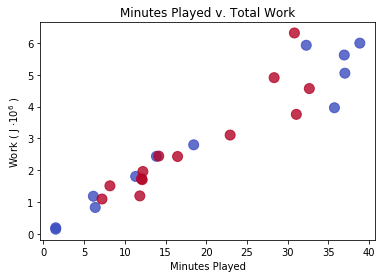

In [8]:
game = '2017/11/22/GSWOKC/'

%matplotlib inline

cmap = plt.cm.coolwarm


x = [] #time (in minutes)
y = [] #total energy
c = []
names = []

for team in ['homeplayers','awayplayers']:
    
    for key in game1[game][team].keys():

        if team == 'homeplayers':
            c.append(0)
        else:
            c.append(1)

        en = np.array(game1[game][team][key]['work'])/game1[game][team][key]['mass'] * 100
        en_no_nan = en[en==en]
        energy = np.nansum(en_no_nan[en_no_nan<10000])

        oc = np.array(game1[game][team][key]['on_court'])

        
        timeplayed = len(oc[oc==False])/25/60
        y.append(energy/(10**6))
        x.append(timeplayed)
        names.append(str(key))
        
    
        
    


fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, alpha=0.8, cmap=cmap)



annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))

annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor('wheat')
    annot.get_bbox_patch().set_alpha(0.6)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
                
                

                
ax.set_ylabel(r'Work ( J $ \cdot 10^6$ )')
ax.set_xlabel('Minutes Played')
ax.set_title('Minutes Played v. Total Work')
# ax.legend()
fig.canvas.mpl_connect("motion_notify_event", hover)
# fig.canvas.mpl_connect("motion_notify_event", hover2)
plt.show()

In [ ]:
## Above Cell Must be running for annotations to work